In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 

%matplotlib inline

In [18]:
covid_data = pd.read_csv("data/Vaccine_Hesitancy.csv")

# take a look at the columns and data types
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   FIPS_Code                     2863 non-null   int64  
 1   County_Name                   2863 non-null   object 
 2   State                         2863 non-null   object 
 3   Estimated_hesitant            2863 non-null   float64
 4   Estimated_hesitant_or_unsure  2863 non-null   float64
 5   Estimated_strongly_hesitant   2863 non-null   float64
 6   SVI                           2863 non-null   float64
 7   SVI_Category                  2863 non-null   object 
 8   CVAC_vloc                     2863 non-null   float64
 9   CVAC_loc                      2863 non-null   object 
 10  Percent_vaccinated            2863 non-null   float64
 11  Percent_Hispanic              2863 non-null   float64
 12  Percent_Native                2863 non-null   float64
 13  Per

In [19]:
# check for missing values in all the columns
covid_data.isnull().sum()

FIPS_Code                       0
County_Name                     0
State                           0
Estimated_hesitant              0
Estimated_hesitant_or_unsure    0
Estimated_strongly_hesitant     0
SVI                             0
SVI_Category                    0
CVAC_vloc                       0
CVAC_loc                        0
Percent_vaccinated              0
Percent_Hispanic                0
Percent_Native                  0
Percent_Asian                   0
Percent_Black                   0
Percent_Hawaiian                0
Percent_White                   0
Geographical_Point              0
State_Code                      0
dtype: int64

In [20]:
# accessing data from SVI
SVI = covid_data.SVI

# access CVAC from all counties
CVAC = covid_data.CVAC_vloc

# access Extremely hesistant from all counties 
ext_hesitant = covid_data.Estimated_strongly_hesitant

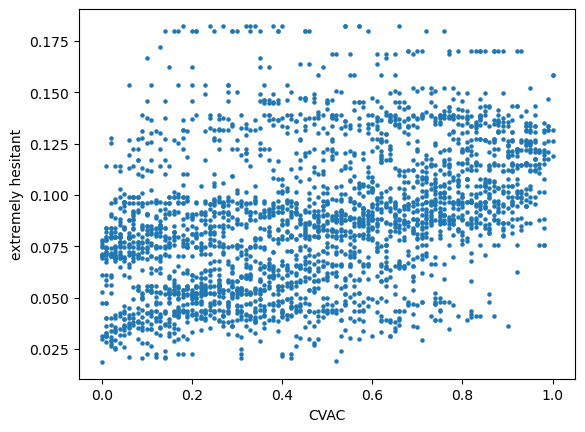

In [21]:
# plot CVAC and extremely hesitant
plt.scatter(CVAC, ext_hesitant,s=5)
plt.xlabel('CVAC')
plt.ylabel('extremely hesitant')
plt.show()

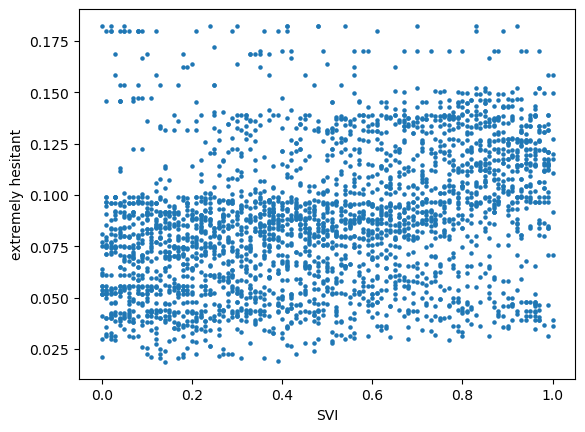

In [22]:
# plot SVI and extremely hesitant
plt.scatter(SVI, ext_hesitant,s=5)
plt.xlabel('SVI')
plt.ylabel('extremely hesitant')
plt.show()

In [23]:
# compute the pair wise correlation for all columns  
correlation_matrix = covid_data.corr().round(2)

<AxesSubplot:>

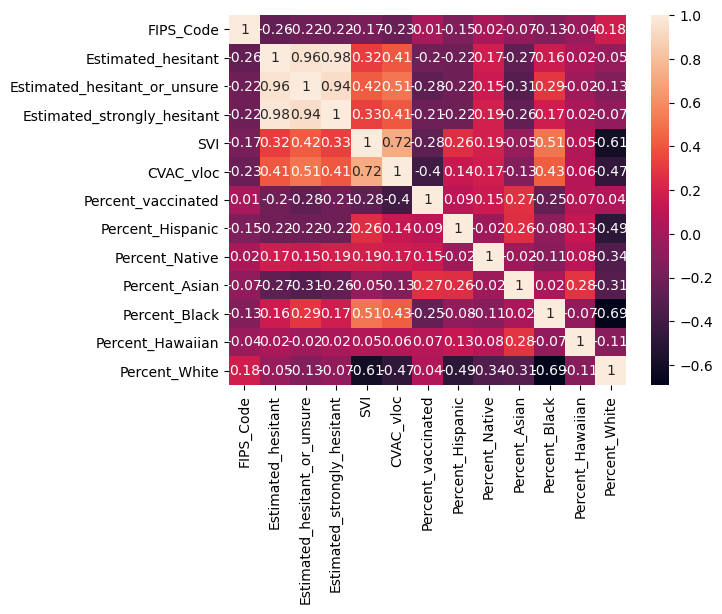

In [24]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

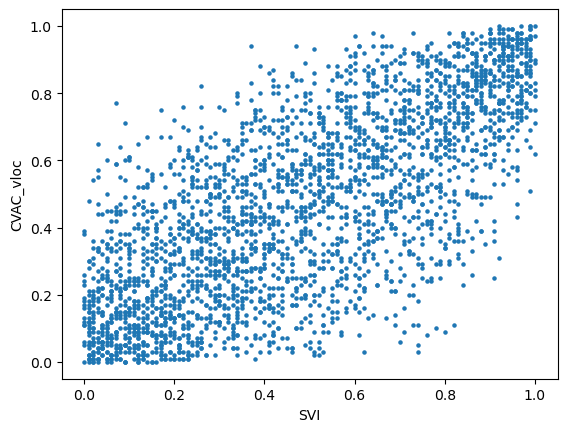

In [25]:
# plot SVI and extremely hesitant
plt.scatter(SVI, CVAC,s=5)
plt.xlabel('SVI')
plt.ylabel('CVAC_vloc')
plt.show()

In [26]:
deaths = pd.read_csv("data/COVID_Deaths.csv")

# take a look at the columns and data types
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      2305 non-null   object 
 1   County name                2305 non-null   object 
 2   FIPS County Code           2305 non-null   int64  
 3   Urban Rural Code           2305 non-null   object 
 4   Deaths involving COVID-19  2305 non-null   float64
 5   Deaths from All Causes     2305 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 108.2+ KB


In [27]:
# check for missing values in all the columns
deaths.isnull().sum()

State                        0
County name                  0
FIPS County Code             0
Urban Rural Code             0
Deaths involving COVID-19    0
Deaths from All Causes       0
dtype: int64

In [28]:
# make a new column (percentage of deaths involving covid-19)
deaths["Percent deaths involving COVID"] = deaths["Deaths involving COVID-19"] / deaths["Deaths from All Causes"]

In [29]:
# combine deaths and hesitancy horizontally, but lining up based on county
hesitancy_deaths = deaths.merge(covid_data, left_on="FIPS County Code", 
                      right_on="FIPS_Code", how = 'inner')

In [30]:
hesitancy_deaths

,State_x,County name,FIPS County Code,Urban Rural Code,Deaths involving COVID-19,Deaths from All Causes,Percent deaths involving COVID,FIPS_Code,County_Name,State_y,...,CVAC_loc,Percent_vaccinated,Percent_Hispanic,Percent_Native,Percent_Asian,Percent_Black,Percent_Hawaiian,Percent_White,Geographical_Point,State_Code
0,AK,Anchorage Municipality,2020,Medium metro,204.0,3143.0,0.064906,2020,"Anchorage Municipality, Alaska",ALASKA,...,Moderate Concern,0.542,0.0917,0.0737,0.0943,0.0528,0.0241,0.5790,(-151.631889 63.631126),AK
1,AK,Bethel Census Area,2050,Noncore,17.0,154.0,0.110390,2050,"Bethel Census Area, Alaska",ALASKA,...,Very High Concern,0.689,0.0260,0.8250,0.0108,0.0074,0.0022,0.0973,(-151.631889 63.631126),AK
2,AK,Fairbanks North Star Borough,2090,Small metro,47.0,741.0,0.063428,2090,"Fairbanks North Star Borough, Alaska",ALASKA,...,Moderate Concern,0.437,0.0805,0.0727,0.0309,0.0428,0.0051,0.6993,(-151.631889 63.631126),AK
3,AK,Kenai Peninsula Borough,2122,Noncore,14.0,501.0,0.027944,2122,"Kenai Peninsula Borough, Alaska",ALASKA,...,High Concern,0.435,0.0415,0.0772,0.0157,0.0054,0.0033,0.7992,(-151.631889 63.631126),AK
4,AK,Matanuska-Susitna Borough,2170,Medium metro,47.0,873.0,0.053837,2170,"Matanuska-Susitna Borough, Alaska",ALASKA,...,High Concern,0.331,0.0493,0.0604,0.0137,0.0115,0.0022,0.7922,(-151.631889 63.631126),AK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,WY,Natrona County,56025,Small metro,190.0,1607.0,0.118233,56025,"Natrona County, Wyoming",WYOMING,...,Moderate Concern,0.372,0.0845,0.0098,0.0058,0.0108,0.0017,0.8669,(-107.55145 42.999627),WY
2129,WY,Park County,56029,Noncore,28.0,469.0,0.059701,56029,"Park County, Wyoming",WYOMING,...,Moderate Concern,0.417,0.0544,0.0046,0.0053,0.0067,0.0000,0.9105,(-107.55145 42.999627),WY
2130,WY,Sheridan County,56033,Micropolitan,33.0,489.0,0.067485,56033,"Sheridan County, Wyoming",WYOMING,...,Moderate Concern,0.450,0.0422,0.0179,0.0067,0.0022,0.0000,0.9168,(-107.55145 42.999627),WY
2131,WY,Sweetwater County,56037,Micropolitan,40.0,516.0,0.077519,56037,"Sweetwater County, Wyoming",WYOMING,...,Moderate Concern,0.348,0.1588,0.0102,0.0074,0.0112,0.0003,0.7956,(-107.55145 42.999627),WY


In [31]:
correlation_matrix_deaths = hesitancy_deaths.corr(method ='spearman')
# I need to understand more about the different methods of correlation...
# old code: hesitancy_deaths.corr().round(2)

<AxesSubplot:>

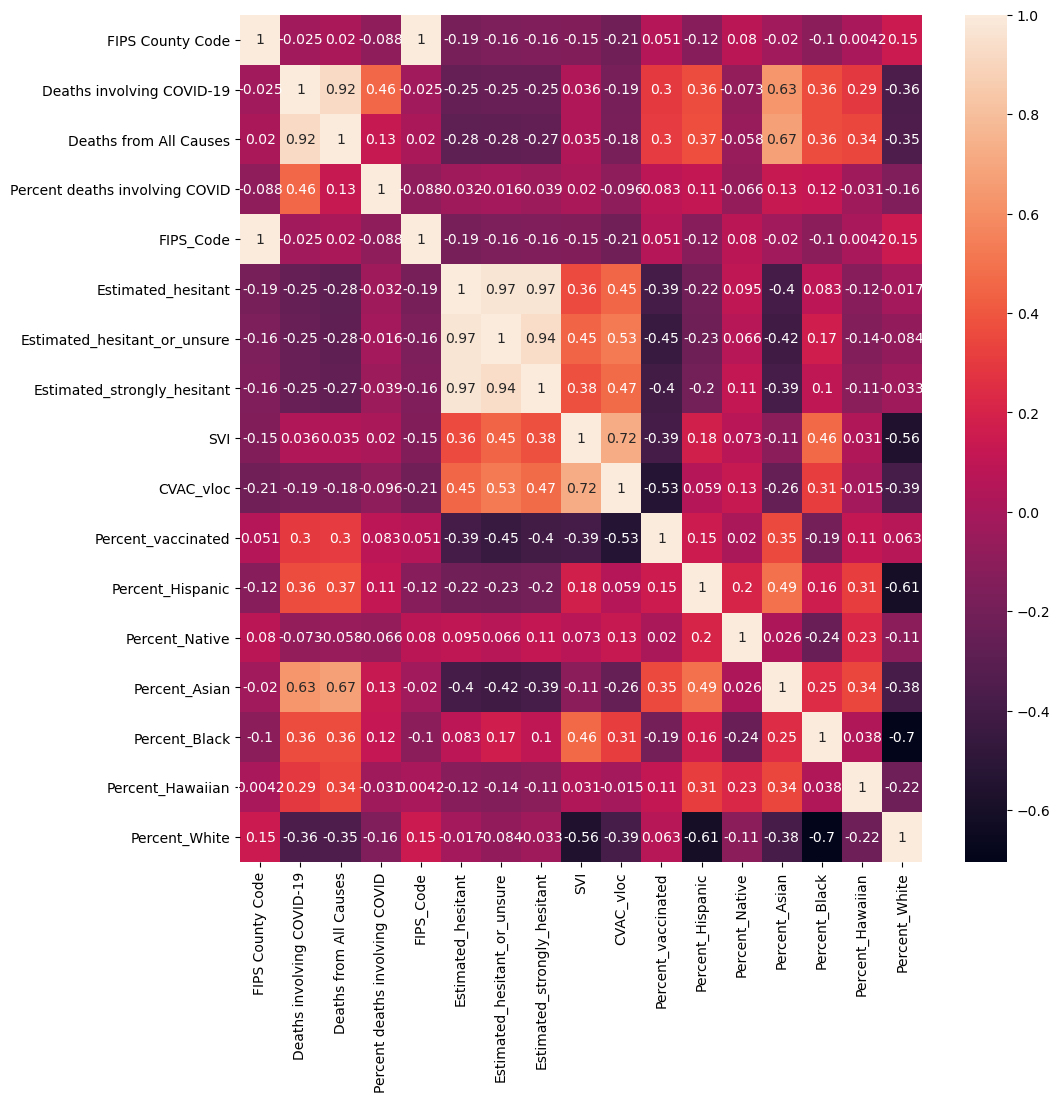

In [32]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(11,11))         # Sample figsize in inches
sns.heatmap(data=correlation_matrix_deaths, ax=ax, annot=True)

In [33]:
#                                 HERE'S OUR NEW PLAN!
# use multiple features to predict one feature (ethnicity + SVI predicting hesitancy)
# apply a 'range' to the data --> add up all the hesitancies and see if it's above 50% or below
# make a model that can predict whether a county is hesitant based on ethnicity and SVI 

In [34]:
# make a new column adding up the percentage of people who are hesitant
covid_data['Percent Hesitant'] = covid_data['Estimated_hesitant'] + covid_data['Estimated_hesitant_or_unsure'] + covid_data['Estimated_strongly_hesitant']

In [35]:
covid_data

,FIPS_Code,County_Name,State,Estimated_hesitant,Estimated_hesitant_or_unsure,Estimated_strongly_hesitant,SVI,SVI_Category,CVAC_vloc,CVAC_loc,Percent_vaccinated,Percent_Hispanic,Percent_Native,Percent_Asian,Percent_Black,Percent_Hawaiian,Percent_White,Geographical_Point,State_Code,Percent Hesitant
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,0.305,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,(-86.844516 32.756889),AL,0.5589
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,0.265,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,(-86.844516 32.756889),AL,0.5501
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,0.394,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,(-86.844516 32.756889),AL,0.5429
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,0.308,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,(-86.844516 32.756889),AL,0.5429
4,1133,"Winston County, Alabama",ALABAMA,0.1805,0.2313,0.1379,0.70,High Vulnerability,0.80,High Concern,0.163,0.0315,0.0034,0.0016,0.0073,0.0005,0.9370,(-86.844516 32.756889),AL,0.5497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,55079,"Milwaukee County, Wisconsin",WISCONSIN,0.1505,0.2144,0.0880,0.81,Very High Vulnerability,0.30,Low Concern,0.543,0.1500,0.0047,0.0428,0.2606,0.0002,0.5124,(-89.732969 44.639954),WI,0.4529
2859,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.1611,0.2126,0.0959,0.28,Low Vulnerability,0.31,Low Concern,0.612,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,(-89.732969 44.639954),WI,0.4696
2860,56001,"Albany County, Wyoming",WYOMING,0.1949,0.2673,0.1405,0.25,Low Vulnerability,0.63,High Concern,0.445,0.0953,0.0091,0.0327,0.0150,0.0003,0.8248,(-107.55145 42.999627),WY,0.6027
2861,55067,"Langlade County, Wisconsin",WISCONSIN,0.1518,0.2007,0.0906,0.35,Low Vulnerability,0.19,Very Low Concern,0.481,0.0197,0.0069,0.0022,0.0125,0.0002,0.9383,(-89.732969 44.639954),WI,0.4431


In [36]:
# make new 'buckets' based on the percent hesitant column 
